In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving got-s8-edges.csv to got-s8-edges.csv
Saving got-s7-edges.csv to got-s7-edges.csv
User uploaded file "got-s8-edges.csv" with length 10355 bytes
User uploaded file "got-s7-edges.csv" with length 7275 bytes


In [ ]:
fh = open("/content/got-s7-edges.csv")
G7 = nx.read_weighted_edgelist(fh,delimiter="," ,  create_using=nx.Graph)
fh.close()

fh = open("/content/got-s8-edges.csv")
G8 = nx.read_weighted_edgelist(fh,delimiter="," ,  create_using=nx.Graph)
fh.close()

G = nx.compose(G7, G8)

# *Métricas de Grafo*


In [ ]:
print(f"Quantidade de Nós: {nx.number_of_nodes(G)}")
print(f"Quantidade de Arestas: {nx.number_of_edges(G)}")

Quantidade de Nós: 103
Quantidade de Arestas: 770


In [ ]:
print(f"{'Grafo Direcionado' if nx.is_directed(G) else 'Grafo Não Direcionado'}")

Grafo Não Direcionado


In [ ]:
print(f"{'Grafo Conexo' if nx.is_connected(G) else 'Grafo Desconexo'}")

Grafo Conexo


In [ ]:
print("Número de Componentes Conexos:", nx.number_connected_components(G))

Número de Componentes Conexos: 1


In [ ]:
print("Diâmetro:", nx.diameter(G))

Diâmetro: 6


In [ ]:
print("Densidade: "+"{:.4f}".format(nx.density(G)))

Densidade: 0.1466


In [ ]:
peso = 0

for no1, no2, dados in G.edges(data=True):
    if "weight" in dados:
        peso += dados["weight"]

print("Soma dos pesos das arestas:", peso)


Soma dos pesos das arestas: 6964.0


In [ ]:
from networkx.algorithms.community import louvain_communities

# Executar o algoritmo de Girvan-Newman para encontrar as comunidades

comunidades = louvain_communities(G, seed=None)

# Imprima as comunidades
for i, c in enumerate(comunidades, 1):
  qtd = len(c)
  lista = []

  degree_centralities = nx.degree_centrality(G)
  sorted_nodes = sorted(degree_centralities, key=lambda x: degree_centralities[x], reverse=True)

  for node in sorted_nodes:
    if node in c:
      central = node
      break

  print(f"Comunidade {i}: Tamanho: {qtd} personagens Personagem Central: {central}\n{c}")
  print('\n')

Comunidade 1: Tamanho: 33 personagens Personagem Central: TYRION
{'LYANNA_MORMONT', 'RHAEGAR', 'SHIREEN', 'MARWYN', 'MISSANDEI', 'DROGO', 'HIGH_SEPTON', 'ALYS', 'MELISANDRE', 'VISERYS', 'DAENERYS', 'JEOR', 'DAVOS', 'TEELA', 'MARTHA', 'TYRION', 'JORAH', 'GILLY', 'GREY_WORM', 'EDDISON_TOLLETT', 'BENJEN', 'NED_UMBER', 'BRONN', 'LITTLE_SAM', 'SAM', 'JON', 'LYANNA', 'UNSULLIED_CAPTAIN', 'QHONO', 'VARYS', 'STANNIS', 'WHITE_WALKER', 'AEGON'}


Comunidade 2: Tamanho: 21 personagens Personagem Central: SANSA
{'BRAN', 'LYSA', 'HARRAG', 'RIVERLANDS_LORD', 'CATELYN', 'SANSA', 'JON_ARRYN', 'LITTLEFINGER', 'THEON', 'DORNISH_PRINCE', 'RAMSAY', 'VALE_LORD', 'ROBETT', 'ROBIN', 'MEERA', 'IRONBORN_LORD', 'HOWLAND', 'MAESTER_WOLKAN', 'EDMURE', 'YOHN_ROYCE', 'NIGHT_KING'}


Comunidade 3: Tamanho: 12 personagens Personagem Central: ARYA
{'THOROS', 'ALANNA', 'GENDRY', 'HOT_PIE', 'BERIC', 'HOUND', 'NORA', 'VICKY', 'ROBERT', 'OWEN', 'ARYA', 'WALDER'}


Comunidade 4: Tamanho: 12 personagens Personagem Central: 

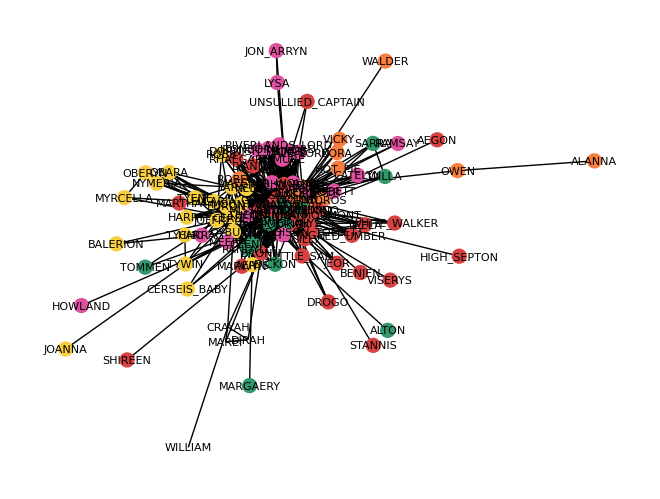

<Figure size 100x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

cores = []

for node in G.nodes:
  if node in comunidades[0]:
    cores.append('#D84141') # daenerys/tyrion
  elif node in comunidades[1]:
    cores.append('#E050A0') # sansa
  if node in comunidades[2]:
    cores.append('#F87D3F') # arya
  elif node in comunidades[3]:
    cores.append('#31996B') # brienne
  elif node in comunidades[4]:
    cores.append('#F8CF3F') # porto real/ cersei
  elif node in comunidades[5]:
    cores.append('#0000') # aleatorios


graus = dict(G.degree)
tamanhos = [int(graus[no]) * 50 for no in G.nodes]


# nx.draw(G, pos, node_color=cores, cmap=plt.get_cmap('viridis'), with_labels=True)
nx.draw_spring(G, node_color=cores, with_labels=True, font_size = 8, node_size = 100 , width = 1)

# Exiba o gráfico
plt.figure(figsize=(1, 5))
plt.show()


# *Métricas de Vértice*


[['TYRION', 51], ['JON', 51], ['SANSA', 49], ['ARYA', 48], ['DAENERYS', 47], ['DAVOS', 45], ['SAM', 45], ['GREY_WORM', 41], ['BRIENNE', 41], ['JAIME', 40], ['VARYS', 39], ['BRAN', 38], ['CERSEI', 36], ['THEON', 36], ['TORMUND', 34]]


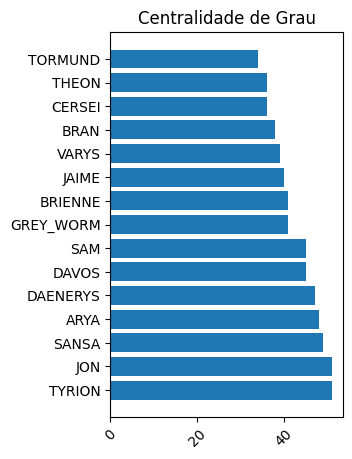

In [ ]:
centralidade_grau = []
for no in G:
  centralidade_grau.append([no, G.degree[no]])

centralidade_grau.sort(key=lambda x: x[1], reverse=True)
centralidade_grau = centralidade_grau[0:15]
print(centralidade_grau)

personagens = [item[0] for item in centralidade_grau]
graus = [item[1] for item in centralidade_grau]

plt.figure(figsize=(3,5))

plt.barh(personagens, graus)
plt.title('Centralidade de Grau')
plt.xticks(rotation=45)
plt.show()

In [ ]:
degrees = dict(nx.degree(G))

# Calcular o grau médio
average_degree = sum(degrees.values()) / len(degrees)

print(f"Grau Médio: {average_degree:.2f}")
a = b = 0
for d in degrees.values():
  if d <= 20:
    a+=1
  else:
    b+=1

print(a, b)

Grau Médio: 14.95
75 28


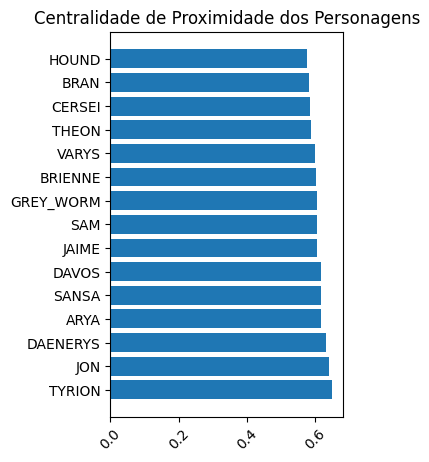

In [ ]:
#proximidade

lista_proximidade = []
proximidades = nx.closeness_centrality(G)

for no, prox in proximidades.items():
    lista_proximidade.append([no, prox])

lista_proximidade.sort(key=lambda x: x[1], reverse=True)
lista_proximidade = lista_proximidade[0:15]

personagens = [item[0] for item in lista_proximidade]
proximidades = [item[1] for item in lista_proximidade]

plt.figure(figsize=(3,5))
plt.barh(personagens, proximidades)
plt.title('Centralidade de Proximidade dos Personagens')
plt.xticks(rotation=45)
plt.show()


#historiograma


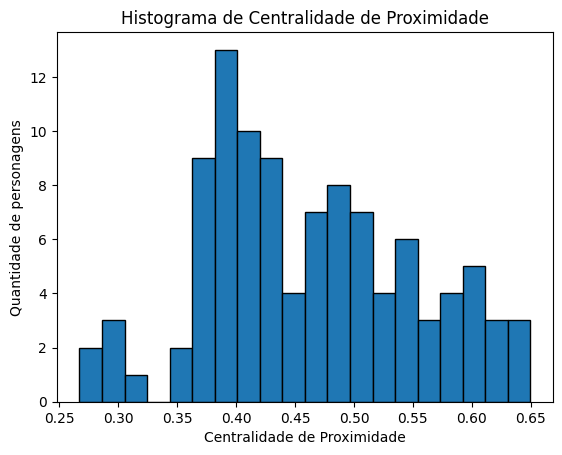

In [ ]:
closeness = nx.closeness_centrality(G)

# Extraia os valores da centralidade de betweenness em uma lista
closeness_values = list(closeness.values())

# Crie um histograma
plt.hist(closeness_values, bins=20, edgecolor='k')
plt.xlabel('Centralidade de Proximidade')
plt.ylabel('Quantidade de personagens')
plt.title('Histograma de Centralidade de Proximidade')
plt.show()

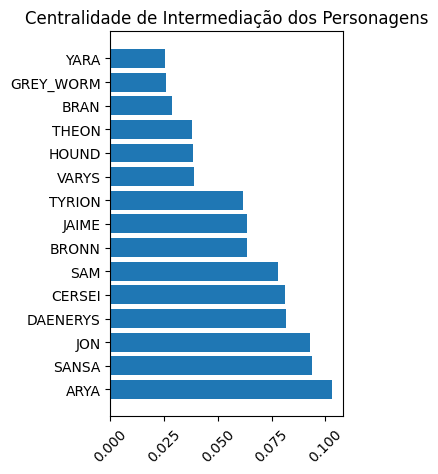

In [ ]:
#intermed

intermediacoes = nx.betweenness_centrality(G)
lista_intermediacoes = []

for no, inter in intermediacoes.items():
    lista_intermediacoes.append([no, inter])

lista_intermediacoes.sort(key=lambda x: x[1], reverse=True)
lista_intermediacoes = lista_intermediacoes[0:15]

personagens = [item[0] for item in lista_intermediacoes]
intermediacoes = [item[1] for item in lista_intermediacoes]

plt.figure(figsize=(3,5))
plt.barh(personagens, intermediacoes)
plt.title('Centralidade de Intermediação dos Personagens')
plt.xticks(rotation=45)
plt.show()



Métricas globais

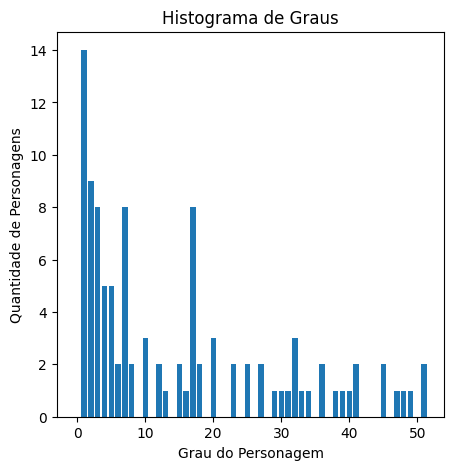

In [ ]:
histograma_grau = nx.degree_histogram(G)

plt.figure(figsize=(5,5))
plt.bar(range(len(histograma_grau)), histograma_grau)
plt.xlabel('Grau do Personagem')
plt.ylabel('Quantidade de Personagens')
plt.title('Histograma de Graus')
plt.show()

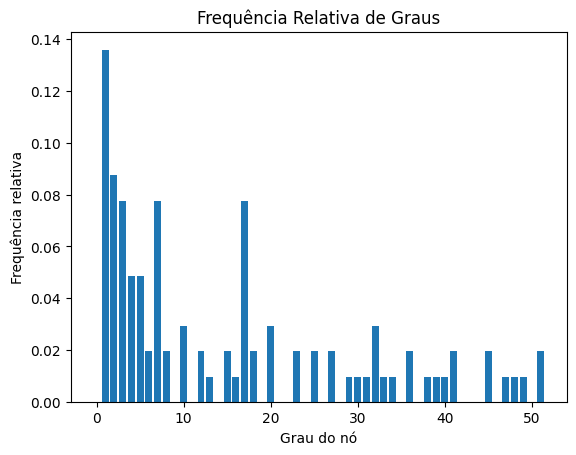

In [ ]:
graus = [grau for no, grau in G.degree()]
quantidade_nos = len(G)
fraquencia_graus = [qtd / quantidade_nos for qtd in histograma_grau]

# Plotar o histograma de frequência relativa
plt.bar(range(len(fraquencia_graus)), fraquencia_graus)
plt.xlabel('Grau do nó')
plt.ylabel('Frequência relativa')
plt.title('Frequência Relativa de Graus')
plt.show()

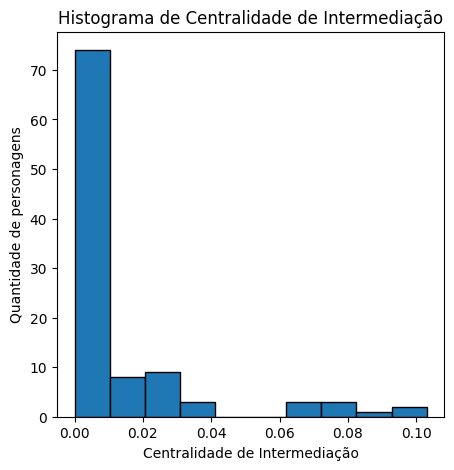

In [ ]:
intermediacoes = nx.betweenness_centrality(G)

# Extraia os valores da centralidade de betweenness em uma lista
intermediacoes = list(intermediacoes.values())
plt.figure(figsize=(5,5))  # Largura x Altura

# Crie um histograma
plt.hist(intermediacoes, bins=10, edgecolor='k')
plt.xlabel('Centralidade de Intermediação')
plt.ylabel('Quantidade de personagens')
plt.title('Histograma de Centralidade de Intermediação')
plt.show()

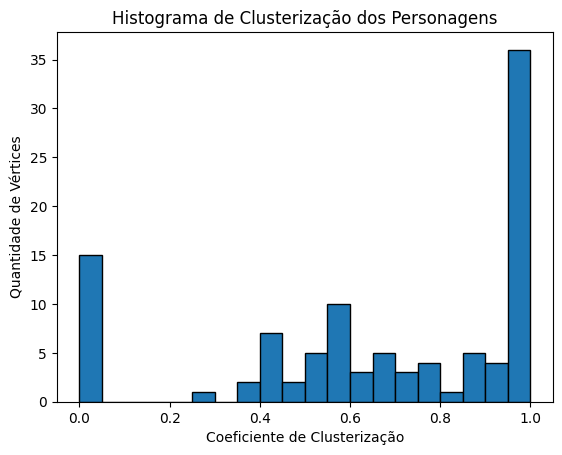

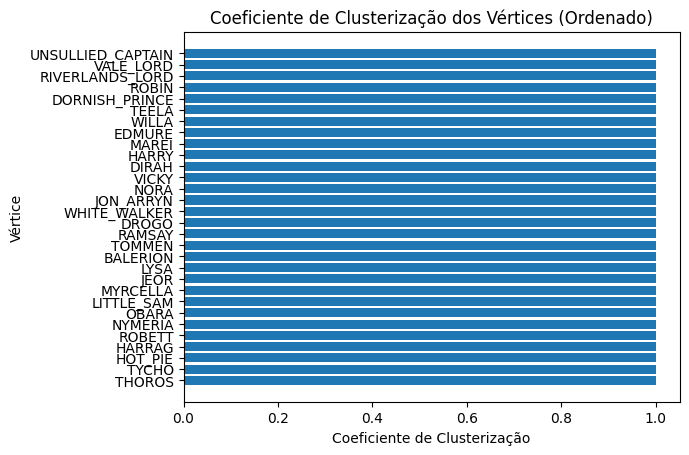

In [ ]:
# Calcular coeficiente de clusterização de cada vértice (ordernado por asc)
clustering_coefficients = nx.clustering(G)
sorted_coefficients = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=False)
sorted_coefficients = sorted_coefficients[0:30]

# Extrair os vértices e coeficientes ordenados (ordernado por asc)
nodes, coefficients = zip(*sorted_coefficients)

# Calcular coeficiente de clusterização de cada vértice (ordernado por asc)
clustering_coefficients_desc = nx.clustering(G)
sorted_coefficients_desc = sorted(clustering_coefficients_desc.items(), key=lambda x: x[1], reverse=True)
sorted_coefficients_desc = sorted_coefficients_desc[0:30]

# Extrair os vértices e coeficientes ordenados (ordernado por asc)
nodes_desc, coefficients_desc = zip(*sorted_coefficients_desc)

gc = list(clustering_coefficients.values())

# Crie um histograma
plt.hist(gc, bins=20, edgecolor='k')
plt.xlabel('Coeficiente de Clusterização')
plt.ylabel('Quantidade de Vértices')
plt.title('Histograma de Clusterização dos Personagens')
plt.show()

plt.barh(nodes_desc, coefficients_desc)
plt.ylabel('Vértice')
plt.xlabel('Coeficiente de Clusterização')
plt.title('Coeficiente de Clusterização dos Vértices (Ordenado)')
plt.show()